<a href="https://colab.research.google.com/github/pdrzxzz/world-population-growth-rate-in-R/blob/main/world-population-growth-rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[1]]
 [1] "nortest"   "plotly"    "ggplot2"   "dplyr"     "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "nortest"   "plotly"    "ggplot2"   "dplyr"     "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "nortest"   "plotly"    "ggplot2"   "dplyr"     "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "nortest"   "plotly"    "ggplot2"   "dplyr"     "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"

  mean_pop_2023 mean_pop_2024 mean_growth median_pop_2023 median_pop_2024
1       2615341       2665356     2.00781         1364431         1379998
  median_growth sd_growth var_growth
1         1.975  1.214472   1.474942
[1] "Negative outlier cities:"
            City       Country     Continent Population..2024.
49      New York United States North America           7931147
130  Los Angeles United States North America           3748640
196      Chicago United States North America           2590002
351 Philadelphia United States North America           1533916
637     San Jose United States North America            932636
    Population..2023. Growth.Rate
49            8133522       -2.49
130           3785439       -0.97
196           2627520       -1.43
351           1550587       -1.07
637            951934       -2.03
[1] "Positive outlier cities:"
              City      Country Continent Population..2024. Population..2023.
48   Dar Es Salaam     Tanzania    Africa           8161

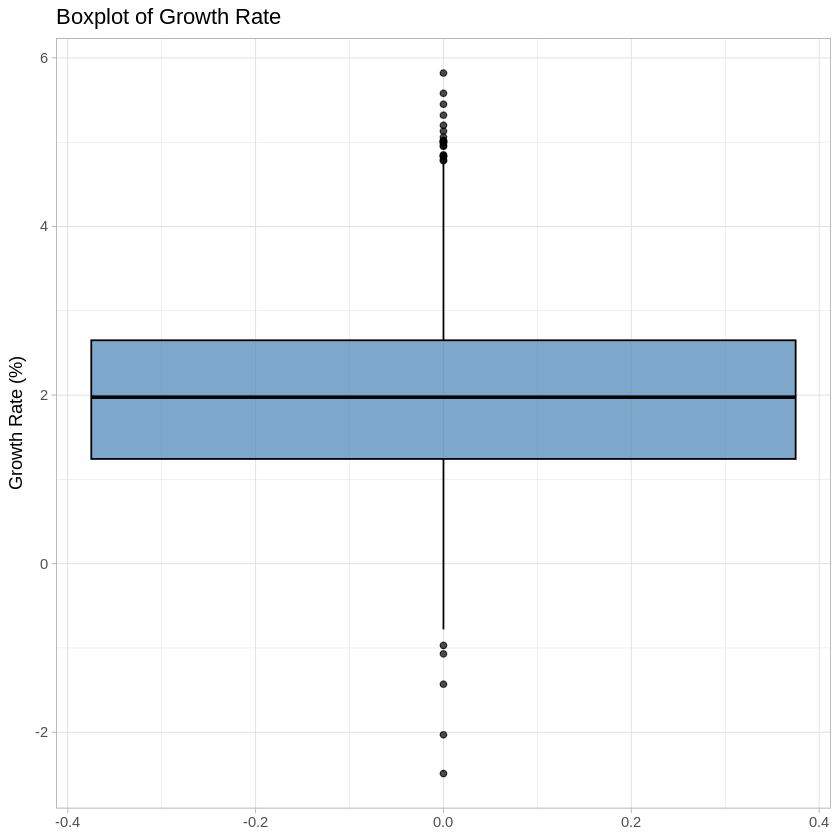


Anderson-Darling test (with outliers):

	Anderson-Darling normality test

data:  data$Growth.Rate
A = 1.9341, p-value = 6.198e-05


Anderson-Darling test (without positive outliers):

	Anderson-Darling normality test

data:  cleaned_data$Growth.Rate
A = 0.68548, p-value = 0.07318



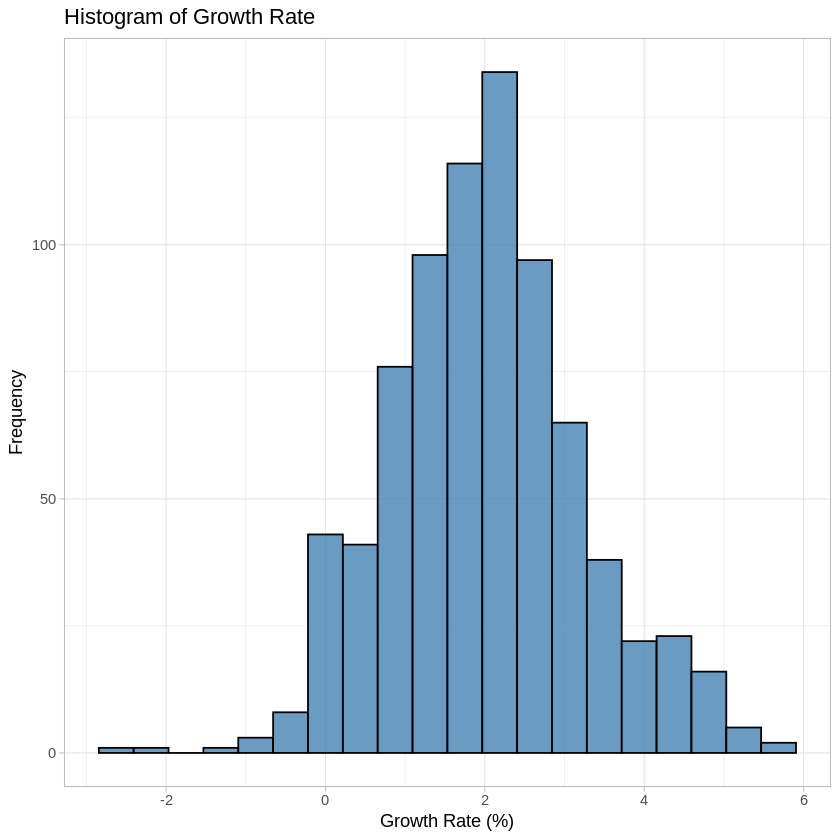

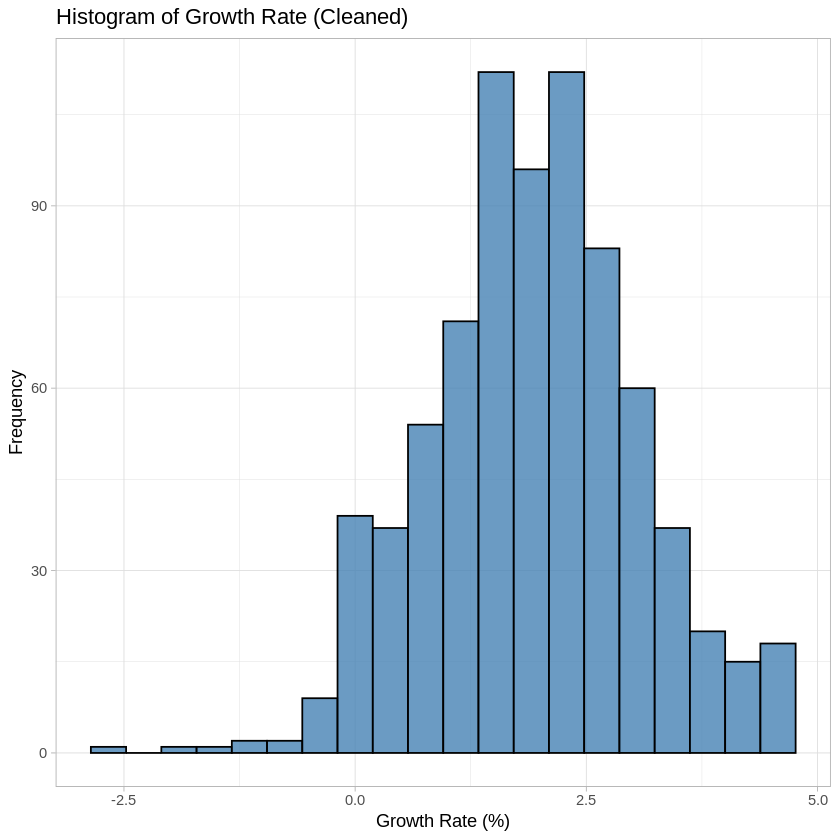


T-test: Is America's growth rate lower than other continents?

	Welch Two Sample t-test

data:  non_american_data$Growth.Rate and american_data$Growth.Rate
t = 12.213, df = 236.69, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.8607648       Inf
sample estimates:
mean of x mean of y 
 2.089829  1.094480 


T-test: Is Japan's growth rate lower than other countries?

	Welch Two Sample t-test

data:  japan_data$Growth.Rate and non_japan_data$Growth.Rate
t = -44.54, df = 86.752, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -2.047059
sample estimates:
 mean of x  mean of y 
-0.1733333  1.9531012 



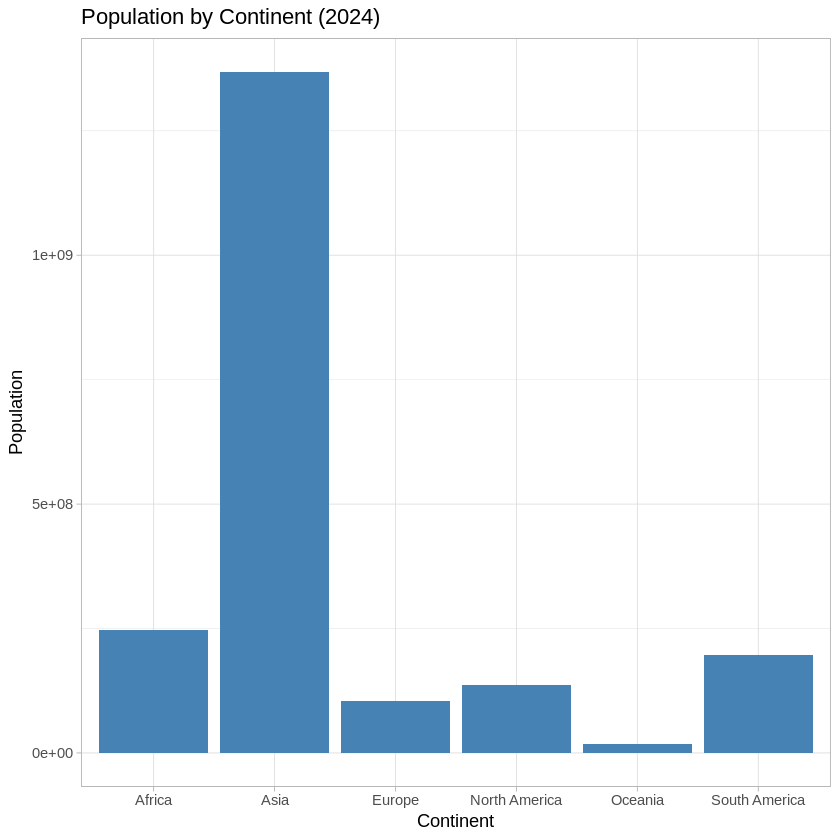

In [3]:
####### REQUIRED PACKAGES INSTALLATION AND LOADING #######
# Define required packages
packages <- c("dplyr", "ggplot2", "plotly", "nortest")

# Check which packages are not installed yet
installed <- packages %in% rownames(installed.packages())

# Install missing packages
if (any(!installed)) install.packages(packages[!installed])

# Load all packages
lapply(packages, library, character.only = TRUE)


####### LOAD DATASET #######
# Reading dataset from local CSV file 'world-population-growth-rate.csv'
# Assumes the file is in working directory
data <- read.csv("world-population-growth-rate.csv")


####### DATA PREPROCESSING #######
# Convert Growth Rate from decimal fraction to percentage (e.g., 0.02 -> 2%)
data <- data %>%
  mutate(Growth.Rate = Growth.Rate * 100)

# Fix typo in Continent column ("Oceana" should be "Oceania")
data$Continent[data$Continent == "Oceana"] <- "Oceania"

# Remove rows where Continent column is empty or missing to avoid errors in analysis
data <- filter(data, Continent != "")


####### DESCRIPTIVE STATISTICS #######
# Calculate summary statistics for population (2023 and 2024) and growth rate
# These give an overview of central tendency and dispersion
summary_stats <- data %>%
  summarise(
    mean_pop_2023 = mean(Population..2023.),     # Average population in 2023
    mean_pop_2024 = mean(Population..2024.),     # Average population in 2024
    mean_growth = mean(Growth.Rate),             # Average growth rate (%)
    median_pop_2023 = median(Population..2023.), # Median population in 2023
    median_pop_2024 = median(Population..2024.), # Median population in 2024
    median_growth = median(Growth.Rate),         # Median growth rate (%)
    sd_growth = sd(Growth.Rate),                  # Standard deviation of growth rate (%)
    var_growth = var(Growth.Rate)                 # Variance of growth rate (%)
  )
print(summary_stats)


####### BOXPLOT AND OUTLIERS ANALYSIS #######
# Plot boxplot of growth rate using ggplot2 for better style and white background
# Boxplot visualizes distribution, center, spread, and identifies outliers
ggplot(data, aes(y = Growth.Rate)) +
  geom_boxplot(fill = "steelblue", color = "black", alpha = 0.7) +
  theme_light() +
  labs(title = "Boxplot of Growth Rate", y = "Growth Rate (%)")

# Extract outliers from boxplot stats for further analysis
outliers <- boxplot.stats(data$Growth.Rate)$out

# Separate outliers into negative (below normal) and positive (above normal)
neg_outliers <- outliers[outliers < 0]
pos_outliers <- outliers[outliers >= 0]

# Get data rows corresponding to negative outliers to check which cities have declining populations
neg_outlier_data <- subset(data, Growth.Rate %in% neg_outliers)

# Get data rows corresponding to positive outliers to check fastest growing cities
pos_outlier_data <- subset(data, Growth.Rate %in% pos_outliers)

# Print cities with negative outliers (growth rates significantly below average)
print("Negative outlier cities:")
print(neg_outlier_data)

# Print cities with positive outliers (growth rates significantly above average)
print("Positive outlier cities:")
print(pos_outlier_data)


####### HISTOGRAM OF GROWTH RATE DISTRIBUTION #######
# Visualize distribution of growth rates with histogram (including outliers)
# Histogram shows frequency distribution, helps check skewness, modality, spread
ggplot(data, aes(x = Growth.Rate)) +
  geom_histogram(bins = 20, fill = "steelblue", color = "black", alpha = 0.8) +
  theme_light() +
  labs(title = "Histogram of Growth Rate", x = "Growth Rate (%)", y = "Frequency")


####### NORMALITY TEST WITH OUTLIERS #######
# Perform Anderson-Darling test for normality on growth rate data including outliers
# p-value < 0.05 means data significantly deviates from normal distribution
cat("\nAnderson-Darling test (with outliers):\n")
print(ad.test(data$Growth.Rate))


####### REMOVE POSITIVE OUTLIERS AND REANALYZE #######
# Remove positive outliers to analyze if normality improves when extreme growth rates are excluded
cleaned_data <- filter(data, !(Growth.Rate %in% pos_outliers))

# Perform Anderson-Darling test again on cleaned data without positive outliers
cat("\nAnderson-Darling test (without positive outliers):\n")
print(ad.test(cleaned_data$Growth.Rate))

# Plot histogram of cleaned growth rate data (outliers removed)
# This helps visualize if distribution becomes closer to normal shape
ggplot(cleaned_data, aes(x = Growth.Rate)) +
  geom_histogram(bins = 20, fill = "steelblue", color = "black", alpha = 0.8) +
  theme_light() +
  labs(title = "Histogram of Growth Rate (Cleaned)", x = "Growth Rate (%)", y = "Frequency")


####### POPULATION BY CONTINENT #######
# Bar chart showing total population per continent in 2024 after cleaning
# Helps identify which continents have largest urban populations
ggplot(cleaned_data, aes(x = Continent, y = Population..2024.)) +
  geom_col(fill = "steelblue") +
  theme_light() +
  labs(title = "Population by Continent (2024)", y = "Population", x = "Continent")


####### HYPOTHESIS TESTING #######

##### Hypothesis 1: Is growth rate in Americas lower than other continents? #####
# Split cleaned data into Americas (North & South) and non-Americas groups for comparison
american_data <- filter(cleaned_data, Continent %in% c("South America", "North America"))
non_american_data <- filter(cleaned_data, !Continent %in% c("South America", "North America"))

# Welch Two Sample t-test checks if mean growth rate in Americas is significantly lower than in other continents
cat("\nT-test: Is America's growth rate lower than other continents?\n")
print(t.test(non_american_data$Growth.Rate, american_data$Growth.Rate, alternative = "greater"))


##### Hypothesis 2: Is Japan's growth rate lower than other countries? #####
# Separate Japan data from other countries for comparison
japan_data <- filter(cleaned_data, Country == "Japan")
non_japan_data <- filter(cleaned_data, Country != "Japan")

# Welch Two Sample t-test checks if Japan's mean growth rate is significantly lower than that of other countries
cat("\nT-test: Is Japan's growth rate lower than other countries?\n")
print(t.test(japan_data$Growth.Rate, non_japan_data$Growth.Rate, alternative = "less"))
